<a href="https://colab.research.google.com/github/hannari-python/data_analysis_hands_on/blob/main/handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はんなりPython データ分析ハンズオン
- 2021/2/19
- [家計調査(小分類・支出金額)](https://www.stat.go.jp/data/kakei/longtime/index.html)を分析する
- データの取得、前処理、可視化、機械学習を行う
- 機械学習はK-MEANSでの分類を行う
- Inspired by [オープンデータを使って、Pythonでデータ分析 (PyCon JP 2020 チュートリアル)](https://github.com/hannari-python/tutorial)
- [データ csv](https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv)
- メソッド、関数の詳細は?、??、help()を使って調べてください。

In [1]:
!pip install --upgrade plotly
!pip install jupyter_dash

     |████████████████████████████████| 13.2MB 308kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 1.0MB 13.1MB/s 
     |████████████████████████████████| 3.5MB 9.8MB/s 
     |████████████████████████████████| 194kB 37.7MB/s 
     |████████████████████████████████| 1.8MB 62.6MB/s 
     |████████████████████████████████| 358kB 55.5MB/s 
  Created wheel for dash: filename=dash-1.19.0-cp36-none-any.whl size=84013 sha256=d7daa77032a8c6b1e3b6ce2e756f1aba9a078a9c9b7eed9e0a5f03f4b1e75ca5
  Stored in directory: /root/.cache/pip/wheels/f7/50/a7/a230ff7f503b10120bff18c2524a375bb85a61ce6b519c8a77
  Created wheel for dash-renderer: filename=dash_renderer-1.9.0-cp36-none-any.whl size=1014869 sha256=ddc9e94aad7f5ba21b95249f6857d3b68916d37080765bd8ea7adfab31300435
  Stored in directory: /root/.cache/pip/wheels/46/a0/ec/2be2e8fc750e62

In [2]:
from io import StringIO

import pandas as pd 
import requests 

In [3]:
help(StringIO)

Help on class StringIO in module io:

class StringIO(_TextIOBase)
 |  Text I/O implementation using an in-memory buffer.
 |  
 |  The initial_value argument sets the value of object.  The newline
 |  argument is like the one of TextIOWrapper's constructor.
 |  
 |  Method resolution order:
 |      StringIO
 |      _TextIOBase
 |      _IOBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(...)
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __setstate__(...)
 |  
 |  close(self, /)
 |      Close the IO object.
 |      
 |      Attempting any further operation after the object is closed
 |      will raise a ValueError.
 |      
 |      This method has no effect if the file is already closed.
 |  


# データを取得する
- wgetではデータが取得できない

In [4]:
!wget https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv

--2021-01-30 23:25:39--  https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv
Resolving www.stat.go.jp (www.stat.go.jp)... 210.169.215.50, 2001:278:108d:6b::1
Connecting to www.stat.go.jp (www.stat.go.jp)|210.169.215.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188 [text/html]
Saving to: ‘h-mon-a.csv’

h-mon-a.csv         100%[===================>]     188  --.-KB/s    in 0s      

2021-01-30 23:25:40 (33.0 MB/s) - ‘h-mon-a.csv’ saved [188/188]



In [5]:
# 落とせたように見えるが
df = pd.read_csv('/content/h-mon-a.csv')
df.head()

,<html><head><title>Request Rejected</title></head><body>The requested URL was rejected. Please consult with your administrator.<br><br>Your support ID is: 6133672768248129039</body></html>


In [6]:
r = requests.get('https://www.stat.go.jp/data/kakei/longtime/csv/h-mon-a.csv')
print(f'ステイタス {r.status_code}')
r.text

ステイタス 200


'\x93ñ\x90l\x88È\x8fã\x82Ì\x90¢\x91Ñ_\x8ex\x8fo\x8bà\x8az[\x89~],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251\r\n,,,,,,2000\x94N,,,,,,,,,,,,2001

In [7]:
# 数値は出るが文字がおかしそうなので、encodingを確認
r.encoding 

'ISO-8859-1'

In [8]:
# encodingはutf-8にして
r.encoding = 'shift-jis'
print(r.text)


二人以上の世帯_支出金額[円],,,,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251
,,,,,,2000年,,,,,,,,,,,,2001年,,,,,,,,,,,,2002年,,,,,,,,,,,,2003年,,,,,,,,,,,,2004年,,,,

In [9]:
# StringIOを使って文字列をファイルとして扱う　https://docs.python.org/ja/3/library/io.html#io.StringIO
df = pd.read_csv(StringIO(r.text), encoding='shift-jis')

In [10]:
# データが読み込めたか確認、兼、データの内容確認
df.head(20)

,二人以上の世帯_支出金額[円],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251
0,NaN,NaN,NaN,NaN,NaN,NaN,2000年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,(平成12年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成13年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成14年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,(平成30年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成31年),NaN,NaN,NaN,(令和元年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,(令和2年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,表側連番,階層,大分類,中分類,小分類,品目分類,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,...,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,7914,7933,7888,7887,7907,7927,7948,7924,7907,7909,7910,7908,7914,7924,7857,7877,7915,7894,7932,7926,7914,7893,7914,7933,...,7738,7729,7737,7678,7671,7596,7654,7656,7662,7648,7649,7648,7671,7617,7620,7600,7639,7555,7572,7581,7541,7548,7553,7501,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430,7489,7521,7557,7535,7532,7506
5,3,-,-,-,-,世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,3.3,3.3,3.29,3.29,3.29,3.29,3.29,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.26,3.25,3.25,3.25,3.24,3.24,3.24,3.24,3.24,3.24,...,2.98,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.97,2.98,2.98,2.97,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.95,2.95,2.95,2.95,2.94,2.94
6,4,-,-,-,-,18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,0.73,0.72,0.73,0.72,0.72,0.72,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.7,0.69,0.7,0.69,0.69,0.7,0.7,0.7,0.7,0.71,0.71,...,0.54,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.54,0.55,0.55,0.56,0.56,0.56,0.57,0.58,0.59,0.58,0.59,0.59,0.59,0.58,0.57,0.57,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58,0.57,0.57,0.57,0.56,0.55,0.53
7,5,-,-,-,-,65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,0.54,0.55,0.55,0.56,0.57,0.57,0.58,0.57,0.56,0.57,0.57,0.57,0.56,0.55,0.57,0.55,0.57,0.58,0.58,0.58,0.58,0.58,0.59,0.58,0.58,...,0.86,0.85,0.85,0.85,0.85,0.84,0.84,0.84,0.84,0.84,0.84,0.83,0.82,0.83,0.83,0.82,0.82,0.81,0.82,0.83,0.83,0.83,0.83,0.84,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85,0.86,0.86,0.86,0.86,0.85,0.86
8,6,-,-,-,-,うち無職者人員(人),0.41,0.41,0.41,0.41,0.41,0.42,0.42,0.42,0.42,0.42,0.43,0.42,0.43,0.44,0.44,0.45,0.44,0.44,0.44,0.44,0.45,0.44,0.44,0.45,0.43,0.45,0.45,0.46,0.46,0.47,0.47,0.47,0.47,0.47,...,0.69,0.67,0.67,0.67,0.67,0.66,0.67,0.67,0.66,0.67,0.67,0.65,0.65,0.65,0.65,0.64,0.65,0.64,0.65,0.66,0.66,0.66,0.66,0.67,0.67,0.66,0.66,0.66,0.66,0.65,0.66,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.67,0.68
9,7,-,-,-,-,有業人員(人),1.51,1.51,1.51,1.52,1.53,1.53,1.52,1.52,1.51,1.52,1.53,1.52,1.51,1.51,1.51,1.52,1.5,1.53,1.52,1.51,1.51,1.49,1.49,1.48,1.48,1.45,1.45,1.46,1.44,1.45,1.44,1.44,1.44,1.44,...,1.32,1.32,1.33,1.34,1.34,1.34,1.34,1.34,1.36,1.35,1.36,1.36,1.36,1.35,1.35,

### 課題1
- まずはcsvファイルを保存してみましょう
  - ヒント pandasのto_csvメソッドを使いましょう
- データを確認し、どのように処理したいか考えてみましょう
- データ読み取りを関数化しておきましょう

## 前処理

- 日付は西暦で作成します
- 前処理の方針は色々あると思いますが、今回は基礎データと消費支出内容のデータフレームを分けて作成します


In [11]:
# まずは日付の作成
# 西暦は0行目に、月は2行目にあります

seireki = df.iloc[0, :].dropna()
tsuki = df.iloc[2, :].dropna()

print(seireki.values)
print('----')
print(tsuki.values)

['2000年' '2001年' '2002年' '2003年' '2004年' '2005年' '2006年' '2007年' '2008年'
 '2009年' '2010年' '2011年' '2012年' '2013年' '2014年' '2015年' '2016年' '2017年'
 '2018年' '2019年' '2020年']
----
['表側連番' '階層' '大分類' '中分類' '小分類' '品目分類' '1月' '2月' '3月' '4月' '5月' '6月' '7月'
 '8月' '9月' '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月'
 '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月'
 '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月' '11月'
 '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月' '11月' '12月' '1月'
 '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月' '11月' '12月' '1月' '2月' '3月'
 '4月' '5月' '6月' '7月' '8月' '9月' '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月'
 '6月' '7月' '8月' '9月' '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月'
 '8月' '9月' '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月'
 '10月' '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月'
 '11月' '12月' '1月' '2月' '3月' '4月' '5月' '6月' '7月' '8月' '9月' '10月' '11月'
 '12月' '1月' '2月' '3月' '4月

In [12]:
# 月の個数
tsuki[6:].values

array(['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月',
       '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月',
       '11月', '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月',
       '10月', '11月', '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月',
       '8月', '9月', '10月', '11月', '12月', '1月', '2月', '3月', '4月', '5月',
       '6月', '7月', '8月', '9月', '10月', '11月', '12月', '1月', '2月', '3月',
       '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月', '1月',
       '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月',
       '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月',
       '11月', '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月',
       '10月', '11月', '12月', '1月', '2月', '3月', '4月', '5月', '6月', '7月',
       '8月', '9月', '10月', '11月', '12月', '1月', '2月', '3月', '4月', '5月',
       '6月', '7月', '8月', '9月', '10月', '11月', '12月', '1月', '2月', '3月',
       '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月', '1

In [13]:
# 日付を作る方法　2通りかな？　
# 1. ループを使って作る 2. pandasのdate_rangeを使う
# 分かりやすいので後者を使う https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

# 初期設定では月の最後の日が出力される
pd.date_range('2000-01-01', periods=len(tsuki[6:].values), freq='M')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=251, freq='M')

In [14]:
first_year = seireki[0].split('年')[0]
latest_year = seireki[-1].split('年')[0]
latest_month = int(tsuki[-1].split('月')[0].replace(' ', ''))

print(f'{first_year}, {latest_year}, {latest_month}')

2000, 2020, 11


In [15]:
# date_rangeを返す関数を作成
def return_column_date_range(df, col_num):
  year = df.iloc[0, :].dropna()
  month = df.iloc[2, :]

  first_year = seireki[0].split('年')[0]
  period_counts = len(month[col_num:])

  column_date_range = pd.date_range(start=f'{first_year}-01-01', periods=period_counts, freq='M')
  return column_date_range 

columns_data = return_column_date_range(df, 6)
columns_data

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=251, freq='M')

In [16]:
# コラム用データ
columns_data = list(tsuki[:6].values) + list(columns_data)
columns_data[:10]

['表側連番',
 '階層',
 '大分類',
 '中分類',
 '小分類',
 '品目分類',
 Timestamp('2000-01-31 00:00:00', freq='M'),
 Timestamp('2000-02-29 00:00:00', freq='M'),
 Timestamp('2000-03-31 00:00:00', freq='M'),
 Timestamp('2000-04-30 00:00:00', freq='M')]

In [17]:
df.columns = columns_data  
df.head()

,表側連番,階層,大分類,中分類,小分類,品目分類,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,...,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,2000年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,(平成12年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成13年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成14年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,(平成30年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(平成31年),NaN,NaN,NaN,(令和元年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,(令和2年),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,表側連番,階層,大分類,中分類,小分類,品目分類,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,...,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,7914,7933,7888,7887,7907,7927,7948,7924,7907,7909,7910,7908,7914,7924,7857,7877,7915,7894,7932,7926,7914,7893,7914,7933,...,7738,7729,7737,7678,7671,7596,7654,7656,7662,7648,7649,7648,7671,7617,7620,7600,7639,7555,7572,7581,7541,7548,7553,7501,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430,7489,7521,7557,7535,7532,7506


In [18]:
data = df.loc[3:, :].copy()
data.head()

,表側連番,階層,大分類,中分類,小分類,品目分類,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,...,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,7914,7933,7888,7887,7907,7927,7948,7924,7907,7909,7910,7908,7914,7924,7857,7877,7915,7894,7932,7926,7914,7893,7914,7933,...,7738,7729,7737,7678,7671,7596,7654,7656,7662,7648,7649,7648,7671,7617,7620,7600,7639,7555,7572,7581,7541,7548,7553,7501,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430,7489,7521,7557,7535,7532,7506
5,3,-,-,-,-,世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,3.3,3.3,3.29,3.29,3.29,3.29,3.29,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.26,3.25,3.25,3.25,3.24,3.24,3.24,3.24,3.24,3.24,...,2.98,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.97,2.98,2.98,2.97,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.95,2.95,2.95,2.95,2.94,2.94
6,4,-,-,-,-,18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,0.73,0.72,0.73,0.72,0.72,0.72,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.7,0.69,0.7,0.69,0.69,0.7,0.7,0.7,0.7,0.71,0.71,...,0.54,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.54,0.55,0.55,0.56,0.56,0.56,0.57,0.58,0.59,0.58,0.59,0.59,0.59,0.58,0.57,0.57,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58,0.57,0.57,0.57,0.56,0.55,0.53
7,5,-,-,-,-,65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,0.54,0.55,0.55,0.56,0.57,0.57,0.58,0.57,0.56,0.57,0.57,0.57,0.56,0.55,0.57,0.55,0.57,0.58,0.58,0.58,0.58,0.58,0.59,0.58,0.58,...,0.86,0.85,0.85,0.85,0.85,0.84,0.84,0.84,0.84,0.84,0.84,0.83,0.82,0.83,0.83,0.82,0.82,0.81,0.82,0.83,0.83,0.83,0.83,0.84,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85,0.86,0.86,0.86,0.86,0.85,0.86


## データを基礎データと消費データに分ける
- locを使ってデータフレームをスライスします

In [19]:
# まずは **loc** を使ってデータフレームを分割する
# loc は行、列名を用いたスライス
# ilocは行、列番号を用いたスライス

data.loc[:12, :]

,表側連番,階層,大分類,中分類,小分類,品目分類,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,...,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,7928,7917,7907,7908,7917,7937,7914,7933,7888,7887,7907,7927,7948,7924,7907,7909,7910,7908,7914,7924,7857,7877,7915,7894,7932,7926,7914,7893,7914,7933,...,7738,7729,7737,7678,7671,7596,7654,7656,7662,7648,7649,7648,7671,7617,7620,7600,7639,7555,7572,7581,7541,7548,7553,7501,7479,7517,7470,7466,7481,7443,7475,7489,7534,7430,7489,7521,7557,7535,7532,7506
5,3,-,-,-,-,世帯人員(人),3.32,3.32,3.32,3.32,3.31,3.31,3.31,3.31,3.31,3.3,3.3,3.29,3.29,3.29,3.29,3.29,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.26,3.25,3.25,3.25,3.24,3.24,3.24,3.24,3.24,3.24,...,2.98,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.97,2.98,2.98,2.97,2.98,2.98,2.98,2.98,2.98,2.97,2.97,2.97,2.97,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.96,2.95,2.95,2.95,2.95,2.94,2.94
6,4,-,-,-,-,18歳未満人員(人),0.74,0.75,0.75,0.75,0.75,0.74,0.74,0.74,0.74,0.73,0.72,0.73,0.72,0.72,0.72,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.7,0.69,0.7,0.69,0.69,0.7,0.7,0.7,0.7,0.71,0.71,...,0.54,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.54,0.55,0.55,0.56,0.56,0.56,0.57,0.58,0.59,0.58,0.59,0.59,0.59,0.58,0.57,0.57,0.57,0.58,0.58,0.58,0.58,0.58,0.58,0.57,0.58,0.58,0.57,0.57,0.57,0.56,0.55,0.53
7,5,-,-,-,-,65歳以上人員(人),0.52,0.53,0.53,0.52,0.52,0.53,0.54,0.53,0.53,0.54,0.55,0.55,0.56,0.57,0.57,0.58,0.57,0.56,0.57,0.57,0.57,0.56,0.55,0.57,0.55,0.57,0.58,0.58,0.58,0.58,0.58,0.59,0.58,0.58,...,0.86,0.85,0.85,0.85,0.85,0.84,0.84,0.84,0.84,0.84,0.84,0.83,0.82,0.83,0.83,0.82,0.82,0.81,0.82,0.83,0.83,0.83,0.83,0.84,0.83,0.82,0.82,0.82,0.82,0.82,0.83,0.86,0.86,0.85,0.86,0.86,0.86,0.86,0.85,0.86
8,6,-,-,-,-,うち無職者人員(人),0.41,0.41,0.41,0.41,0.41,0.42,0.42,0.42,0.42,0.42,0.43,0.42,0.43,0.44,0.44,0.45,0.44,0.44,0.44,0.44,0.45,0.44,0.44,0.45,0.43,0.45,0.45,0.46,0.46,0.47,0.47,0.47,0.47,0.47,...,0.69,0.67,0.67,0.67,0.67,0.66,0.67,0.67,0.66,0.67,0.67,0.65,0.65,0.65,0.65,0.64,0.65,0.64,0.65,0.66,0.66,0.66,0.66,0.67,0.67,0.66,0.66,0.66,0.66,0.65,0.66,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.67,0.68
9,7,-,-,-,-,有業人員(人),1.51,1.51,1.51,1.52,1.53,1.5

In [20]:
data.loc[13:, :]

,表側連番,階層,大分類,中分類,小分類,品目分類,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,...,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00
13,11,1,-,-,-,消費支出,309621,290663,335341,335276,308566,297648,326480,309993,296457,309193,297144,391556,308912,293698,339910,318509,300346,286054,314251,302474,283973,305653,294929,359940,305221,273487,330380,320228,291968,289427,315699,298788,295423,304989,...,280320,268802,282872,277361,322157,289703,265614,301230,294439,281307,267641,283387,292481,271273,290396,281041,329271,296345,271232,309274,301136,300901,276882,288026,296327,300609,279671,278765,321380,287173,271735,292214,267922,252017,273699,266897,276360,269863,283508,278718
14,12,2,1,-,-,食料,73580,73309,79726,77344,81415,76721,83782,86988,76985,79477,76618,107736,72902,70738,77077,74136,78011,74950,81593,84620,76073,76590,74889,103991,71726,68062,77330,73988,78857,75985,80182,84724,75263,75573,...,84048,75605,77152,77440,101416,76847,71693,79310,75487,78126,75629,79391,84541,76499,79016,76828,98805,75783,71507,80302,77463,81049,77452,79879,85996,79894,77542,78575,100093,76011,75469,79509,73919,78272,77246,79290,85038,78710,79878,79781
15,13,3,1,1,-,穀類,6100,6915,7496,7470,7447,7328,7794,7324,7631,8314,7293,9779,6069,6301,7047,6865,6956,6938,7341,7056,7682,8559,7041,9436,6083,6379,7054,6945,7011,7082,7205,6899,7093,8244,...,6174,6516,7108,6504,7968,5746,5788,6283,6254,6299,6367,6428,6336,6603,7259,6481,7654,5734,5856,6560,6507,6396,6353,6453,6397,6586,7440,6381,7757,5666,6266,7254,7253,7059,6618,6702,6688,6847,7165,6395
16,14,4,1,1,1,米,2338,2919,3226,3346,3264,3165,3160,3164,3867,4386,3379,4042,2271,2565,2993,2956,2964,2931,2842,3044,4058,4722,3192,3753,2257,2629,2933,2940,2917,3003,2817,2819,3505,4410,...,1842,2486,2864,2192,2288,1525,1766,1817,1893,1892,1958,1916,1920,2343,3003,2238,2045,1490,1671,1833,1877,1785,1801,1713,1756,2335,2944,1966,2042,1402,1779,2132,2110,1921,1880,1877,1925,2403,2604,1847
17,15,4,1,1,2,パン,2127,2329,2492,2441,2458,2354,2292,2182,2191,2264,2191,2190,2097,2158,2378,2310,2326,2229,2105,2105,2087,2227,2185,2151,2138,2174,2415,2370,2367,2257,2196,2128,2098,2208,...,2408,2394,2504,2489,2570,2468,2386,2742,2623,2609,2502,2432,2459,2525,2593,2542,2674,2534,2551,2898,2861,2773,2646,2701,2657,2552,2650,2639,2701,2515,2625,2798,2680,2742,2543,2603,2527,2519,2635,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [21]:
fundamentals = data.loc[:12, :].copy()
household = data.loc[13:, :].copy()

### それぞれのデータができました
- 階層、分類を確認しましょう！
- 階層と分類を使うといろいろできそうですが・・・時間がかかりそうなので、今日はやめときます（希望があれば、今後やるのもあり）

In [22]:
# 階層
print(household['階層'].unique())
household[household['階層'] == '2']

['1' '2' '3' '4' '-']


,表側連番,階層,大分類,中分類,小分類,品目分類,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,...,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00
14,12,2,1,-,-,食料,73580,73309,79726,77344,81415,76721,83782,86988,76985,79477,76618,107736,72902,70738,77077,74136,78011,74950,81593,84620,76073,76590,74889,103991,71726,68062,77330,73988,78857,75985,80182,84724,75263,75573,...,84048,75605,77152,77440,101416,76847,71693,79310,75487,78126,75629,79391,84541,76499,79016,76828,98805,75783,71507,80302,77463,81049,77452,79879,85996,79894,77542,78575,100093,76011,75469,79509,73919,78272,77246,79290,85038,78710,79878,79781
55,53,2,2,-,-,住居,16559,18454,18401,18816,19252,21446,24479,18670,19446,20367,22043,28400,16226,18694,17868,18690,22199,20349,21225,19623,17829,20451,18767,24296,15252,17150,17660,19634,20226,21576,24537,19019,19871,21754,...,15416,16178,19659,16029,17225,13777,13649,14683,16585,17120,17696,17957,16422,15833,19163,19194,20962,16278,14347,16090,14912,18692,17085,19267,16260,17869,17370,19009,18056,16070,14966,16811,16642,14170,18584,16911,16756,17001,19753,19977
60,58,2,3,-,-,光熱・水道,24956,25678,25333,22910,21075,18435,18610,20289,20701,19244,19486,22831,26139,26779,24536,21944,20522,18203,18442,20644,19769,18860,19495,23021,26140,25770,23431,21211,19631,18194,18116,20095,20289,18274,...,19383,18826,18724,19724,24001,28245,29645,26996,23210,20644,17867,17896,19680,19607,19394,18822,22230,27288,29286,26828,23455,23224,18933,17679,17990,19343,18565,18670,22149,25688,27273,26712,24734,21358,19777,17779,18747,19679,19355,19538
65,63,2,4,-,-,家具・家事用品,9805,9208,11053,9647,11276,11724,15126,11056,10221,10879,11462,17691,11263,10406,13139,10093,10001,11618,14815,12219,9636,11097,11223,15944,9686,8706,10569,9809,10181,11628,13256,11148,9821,10910,...,11504,9956,9895,12037,13409,10094,8539,10268,10146,10223,11567,13531,11614,9855,10788,11847,14654,10455,9119,10724,9631,12061,12492,12764,13447,16363,9515,10747,13278,9481,10084,10699,9705,12620,16414,15368,14933,12198,13413,12127
75,73,2,5,-,-,被服及び履物,19602,14400,18366,18028,18712,17145,18289,13146,13299,17885,16839,21029,17618,13464,18388,16456,15887,16199,16911,11918,12397,16515,17273,19578,16850,11706,18084,16588,15340,16965,15899,11271,12611,15931,...,8467,8861,11929,13094,13124,13138,8630,13495,11975,11614,10826,11026,8675,9051,11120,13106,13955,12639,8906,13286,11501,12428,11105,10720,9131,10581,10164,12452,12763,12184,8324,9956,5199,7780,10780,8659,7379,7564,10609,10394
93,91,2,6,-,-,保健医療,10941,11789,11767,11251,11335,11210,11918,11161,9965,11391,11655,13350,10615,11092,13088,11485,12194,11670,11321,10888,11197,11929,12229,13076,11688,11188,13155,

In [23]:
#階層分類を持っていない、分類名をカラムに、日付をインデックスに持ってきたデータフレームを作成する

df = pd.read_csv(StringIO(r.text), encoding='shift-jis') # csvの読み込み
df_title = df.iloc[:3, 5:] # タイトル作成用データフレーム
df1 = df.iloc[13:, 5:] # 家計支出データ作成用データフレーム
cols_name = return_column_date_range(df_title,1) # カラム名の作成
df1 = df1.set_index('Unnamed: 5') # 品目名をインデックス名に
df1.index.name = '' # インデックス名は邪魔なので削除
df1.columns = cols_name # カラム名を設定

df1 = df1.T # データフレームをひっくり返す
df1 = df1.astype('int') # データを文字列から数値に
df1.head()

,消費支出,食料,穀類,米,パン,麺類,他の穀類,魚介類,生鮮魚介,塩干魚介,魚肉練製品,他の魚介加工品,肉類,生鮮肉,加工肉,乳卵類,牛乳,乳製品,卵,野菜・海藻,生鮮野菜,乾物・海藻,大豆加工品,他の野菜・海藻加工品,果物,生鮮果物,果物加工品,油脂・調味料,油脂,調味料,菓子類,調理食品,主食的調理食品,他の調理食品,飲料,茶類,コーヒー・ココア,他の飲料,酒類,外食,...,被服及び履物(財・サービス),半耐久財(被服及び履物),サービス(被服及び履物),保健医療(財・サービス),耐久財(保健医療),半耐久財(保健医療),非耐久財(保健医療),サービス(保健医療),交通・通信(財・サービス),耐久財(交通・通信),半耐久財(交通・通信),非耐久財(交通・通信),サービス(交通・通信),教育(財・サービス),非耐久財(教育),サービス(教育),教養娯楽(財・サービス),耐久財(教養娯楽),半耐久財(教養娯楽),非耐久財(教養娯楽),サービス(教養娯楽),諸雑費(財・サービス),耐久財(諸雑費),半耐久財(諸雑費),非耐久財(諸雑費),サービス(諸雑費),調整集計世帯数,教養娯楽関係費,耐久財(教養娯楽関係費),他の教養娯楽関係費,読書,聴視・観覧,旅行,スポーツ,月謝,会費・つきあい費,その他の教養娯楽,消費支出(再掲),基礎的支出,選択的支出
2000-01-31,309621,73580,6100,2338,2127,1325,310,8525,5479,1370,819,858,6229,5144,1085,3390,1590,1114,686,8029,4702,741,1250,1336,2866,2660,205,2897,264,2633,6290,7377,2945,4431,2918,857,578,1483,3004,15955,...,19602,18712,891,10941,1123,422,3410,5986,31386,4435,1025,3876,22049,12532,281,12251,31681,4163,4624,6818,16075,19157,797,2064,4047,12249,736445,34008,3912,30096,4304,2049,8876,3001,3241,1561,7063,309621,184372,125248
2000-02-29,290663,73309,6915,2919,2329,1359,308,8627,5475,1500,802,850,6449,5242,1208,3650,1678,1200,772,8570,5102,744,1298,1427,3168,3001,167,3111,272,2838,6452,7465,2996,4469,3025,856,610,1558,3203,12673,...,14400,13571,830,11789,853,443,3597,6896,31041,5455,887,3856,20843,14481,220,14260,29737,3026,3937,6892,15882,18800,731,2473,4291,11306,735391,32103,2920,29183,4586,2199,9058,2200,3329,1441,6370,290663,170045,120618
2000-03-31,335341,79726,7496,3226,2492,1482,296,9268,5880,1613,794,981,6483,5170,1314,3940,1835,1300,804,9268,5630,841,1311,1487,3270,3111,159,3262,308,2954,7216,8050,3287,4762,3496,1038,673,1784,3722,14255,...,18366,17174,1192,11767,1043,368,3891,6464,39097,9004,1542,4206,24345,17709,1100,16609,36010,4235,5050,8355,18370,22685,1006,2816,4896,13968,735404,39415,4248,35166,4858,1977,12249,3022,3497,1495,8068,335341,186202,149139
2000-04-30,335276,77344,7470,3346,2441,1458,225,8736,5438,1571,761,966,6485,5082,1404,3803,1769,1264,770,9268,5762,828,1262,1415,2999,2848,152,3149,315,2834,6353,8104,3239,4865,3575,994,675,1906,3769,13632,...,18028,16141,1887,11251,1000,286,3340,6624,41356,10981,1563,4087,24725,24049,926,23124,34146,2890,4777,8519,17960,20400,580,2216,4528,13076,734606,37458,3109,34349,4552,2470,10432,3129,3768,1888,8109,335276,173441,161835
2000-05-31,308566,81415,7447,3264,2458,1523,203,8857,5554,1586,756,961,6655,5168,1487,3899,1877,1258,763,9533,5983,767,1314,1469,3148,2985,162,3307,321,2985,6466,7903,3092,4811,4384,1586,676,2122,4133,15682,...,18712,16753,1960,11335,965,513,3370,6487,36089,6613,1158,4467,23852,11512,427,11084,33824,2517,3666,9032,18608,19449,452,2321,4698,11979,733789,38525,3354,35171,4516,2202,11746,2946,3256,1683,8822,308566,177153,131413


## 課題2
- 基礎データも同様にカラムに品目分類、インデックスに日付をデータフレームにしてみましょう
- 家計支出のデータを指数化してみましょう(2000年1月を100としたデータ)

In [24]:
df2 = df1 / df1.iloc[0, :] * 100

# データの可視化
- 作ったデータがどのように動いているか確認します
- Pythonにはいろいろな可視化ツールがあります
  - pandas 
  - matplotlib
  - seaborn
  - plotly
  - bokeh
  - altair
- 何がいいかはその人次第
  - 色々使ってみたいところですが、今日はplotly.expressを使います
- plotly.express 
  - plotlyのラッパ
  - 簡単に使える（複雑なことはできない）
  - インタラクティブ
- dash
  - インタラクティブなwebアプリケーションを簡単に作れる
  - jupyter_dash: dashをjupyter上で使える


In [25]:
import plotly.express as px
from jupyter_dash import JupyterDash 
import dash_html_components as html 
import dash_core_components as dcc 
from dash.dependencies import Input, Output

In [26]:
px.line(df1, x=df1.index, y='消費支出', title='消費支出')

In [27]:
px.line(df2, x=df2.index, y=['米', 'パン'])

## Dashを使う
- いろいろどんなデータがあるか見るのメンドクサイ
- Dashを使うと簡単に見れる

In [28]:
app = JupyterDash()

app.layout = html.Div([
                       dcc.Dropdown(id='sel_df', options=[{'value': d, 'label': d} for d in ['実額', '指数']], value='実額'),
                       dcc.Dropdown(id='ddown', options=[{'value': col, 'label': col} for col in df1.columns], value=['消費支出'], multi=True),
                       dcc.Graph(id='graph')
])
@app.callback(Output('graph', 'figure'), Input('sel_df', 'value'), Input('ddown', 'value'))
def update_graph(selected_df, selected_values):
  if selected_df == '実額':
    return px.line(df1, x=df1.index, y=selected_values)
  else:
    return px.line(df2, x=df2.index, y=selected_values)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## 課題3
- 上で作ったアプリを作って、データを色々見てみましょう
- 気になることがあったら書いてみてください


# 機械学習を使って分類する
- 機械学習を使って各品目を分類してみます
- 日本の消費の変化を感じる
- それを知ることにより、参入すべきエリアなどが分かるのではないか？

In [29]:
from sklearn.cluster import KMeans

In [32]:
df2_k = df2.T
df2_k.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,...,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
消費支出,100.0,93.877030,108.306930,108.285937,99.659261,96.133014,105.445044,100.120147,95.748350,99.861766,95.970235,126.462998,99.771010,94.857261,109.782605,102.870606,97.004402,92.388436,101.495377,97.691694,91.716324,98.718433,95.254844,116.251805,98.578908,88.329603,106.704649,103.425801,94.298513,93.477833,101.963045,96.501206,95.414394,98.503977,93.380617,115.206010,96.483766,87.403309,103.948699,101.761185,...,90.536495,86.816463,91.360728,89.580810,104.048821,93.566974,85.786817,97.289913,95.096586,90.855271,86.441488,91.527061,94.464200,87.614535,93.790796,90.769360,106.346469,95.712177,87.601293,99.887927,97.259553,97.183654,89.426105,93.025344,95.706364,97.089345,90.326884,90.034268,103.797869,92.749846,87.763750,94.377965,86.532244,81.395319,88.398074,86.201194,89.257512,87.159140,91.566141,90.019088
食料,100.0,99.631693,108.352813,105.115521,110.648274,104.268823,113.865181,118.222343,104.627616,108.014406,104.128839,146.420223,99.078554,96.137537,104.752650,100.755640,106.022017,101.861919,110.890188,115.004077,103.388149,104.090786,101.779016,141.330525,97.480294,92.500680,105.096494,100.554499,107.171786,103.268551,108.972547,115.145420,102.287306,102.708616,101.819788,139.452297,95.907855,91.435173,103.977983,98.581136,...,114.226692,102.752107,104.854580,105.245991,137.830932,104.440065,97.435444,107.787442,102.591737,106.178309,102.784724,107.897527,114.896711,103.967111,107.387877,104.414243,134.282414,102.994020,97.182658,109.135635,105.277249,110.150856,105.262300,108.560750,116.874151,108.581136,105.384615,106.788529,136.032889,103.303887,102.567274,108.057896,100.460723,106.376733,104.982332,107.760261,115.572166,106.972003,108.559391,108.427562
穀類,100.0,113.360656,122.885246,122.459016,122.081967,120.131148,127.770492,120.065574,125.098361,136.295082,119.557377,160.311475,99.491803,103.295082,115.524590,112.540984,114.032787,113.737705,120.344262,115.672131,125.934426,140.311475,115.426230,154.688525,99.721311,104.573770,115.639344,113.852459,114.934426,116.098361,118.114754,113.098361,116.278689,135.147541,115.868852,144.901639,94.475410,100.049180,114.573770,113.163934,...,101.213115,106.819672,116.524590,106.622951,130.622951,94.196721,94.885246,103.000000,102.524590,103.262295,104.377049,105.377049,103.868852,108.245902,119.000000,106.245902,125.475410,94.000000,96.000000,107.540984,106.672131,104.852459,104.147541,105.786885,104.868852,107.967213,121.967213,104.606557,127.163934,92.885246,102.721311,118.918033,118.901639,115.721311,108.491803,109.868852,109.639344,112.245902,117.459016,104.836066
米,100.0,124.850299,137.981180,143.113772,139.606501,135.372113,135.158255,135.329341,165.397776,187.596236,144.525235,172.882806,97.134303,109.709153,128.015398,126.432849,126.775021,125.363559,121.556886,130.196749,173.567151,201.967494,136.526946,160.521814,96.535500,112.446536,125.449102,125.748503,124.764756,128.443114,120.487596,120.573139,149.914457,188.622754,133.661249,138.408896,85.585971,105.089820,122.797263,125.406330,...,78.785287,106.330197,122.4

In [33]:
model = KMeans(n_clusters=4)
cluster = model.fit_predict(df2_k)

In [44]:
cluster

array([2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 3, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 3, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2],
      dtype=int32)

In [45]:
# クラスタごとの数を知りたいのでcollectionのCounterを使う

from collections import Counter 

Counter(cluster)

Counter({0: 33, 1: 49, 2: 89, 3: 4})

In [38]:
# 各クラスタの中央値
model.cluster_centers_

array([[100.        ,  79.31981373,  91.15161829, ...,  43.77798935,
         55.04698183,  53.84723119],
       [100.        , 104.74212465, 123.39246815, ..., 148.63408692,
        147.77043961, 149.14840211],
       [100.        ,  99.12729768, 120.25748901, ...,  90.90675735,
         96.13920146,  92.20567737],
       [100.        , 147.92085304, 136.4594083 , ..., 239.9649276 ,
        296.3756531 , 262.97888214]])

In [41]:
cluster_df = pd.DataFrame(model.cluster_centers_)
cluster_df.columns = df2_k.columns 
cluster_df = cluster_df.T

In [42]:
px.line(cluster_df, x=cluster_df.index, y=[0,1,2,3])

In [47]:
# クラスターのついたデータフレームを作成する
df2_cluster = df2_k.copy()
df2_cluster['cluster'] = cluster 
df2_cluster.head()

,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,...,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,cluster
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
消費支出,100.0,93.877030,108.306930,108.285937,99.659261,96.133014,105.445044,100.120147,95.748350,99.861766,95.970235,126.462998,99.771010,94.857261,109.782605,102.870606,97.004402,92.388436,101.495377,97.691694,91.716324,98.718433,95.254844,116.251805,98.578908,88.329603,106.704649,103.425801,94.298513,93.477833,101.963045,96.501206,95.414394,98.503977,93.380617,115.206010,96.483766,87.403309,103.948699,101.761185,...,86.816463,91.360728,89.580810,104.048821,93.566974,85.786817,97.289913,95.096586,90.855271,86.441488,91.527061,94.464200,87.614535,93.790796,90.769360,106.346469,95.712177,87.601293,99.887927,97.259553,97.183654,89.426105,93.025344,95.706364,97.089345,90.326884,90.034268,103.797869,92.749846,87.763750,94.377965,86.532244,81.395319,88.398074,86.201194,89.257512,87.159140,91.566141,90.019088,2
食料,100.0,99.631693,108.352813,105.115521,110.648274,104.268823,113.865181,118.222343,104.627616,108.014406,104.128839,146.420223,99.078554,96.137537,104.752650,100.755640,106.022017,101.861919,110.890188,115.004077,103.388149,104.090786,101.779016,141.330525,97.480294,92.500680,105.096494,100.554499,107.171786,103.268551,108.972547,115.145420,102.287306,102.708616,101.819788,139.452297,95.907855,91.435173,103.977983,98.581136,...,102.752107,104.854580,105.245991,137.830932,104.440065,97.435444,107.787442,102.591737,106.178309,102.784724,107.897527,114.896711,103.967111,107.387877,104.414243,134.282414,102.994020,97.182658,109.135635,105.277249,110.150856,105.262300,108.560750,116.874151,108.581136,105.384615,106.788529,136.032889,103.303887,102.567274,108.057896,100.460723,106.376733,104.982332,107.760261,115.572166,106.972003,108.559391,108.427562,2
穀類,100.0,113.360656,122.885246,122.459016,122.081967,120.131148,127.770492,120.065574,125.098361,136.295082,119.557377,160.311475,99.491803,103.295082,115.524590,112.540984,114.032787,113.737705,120.344262,115.672131,125.934426,140.311475,115.426230,154.688525,99.721311,104.573770,115.639344,113.852459,114.934426,116.098361,118.114754,113.098361,116.278689,135.147541,115.868852,144.901639,94.475410,100.049180,114.573770,113.163934,...,106.819672,116.524590,106.622951,130.622951,94.196721,94.885246,103.000000,102.524590,103.262295,104.377049,105.377049,103.868852,108.245902,119.000000,106.245902,125.475410,94.000000,96.000000,107.540984,106

In [50]:
three = df2_cluster[df2_cluster['cluster'] == 3]
three

,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,...,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,cluster
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
設備材料,100.0,171.877891,116.651249,203.422757,108.510638,297.502313,305.642923,130.989824,133.580019,141.535615,173.728030,248.196115,181.776133,154.301573,101.480111,245.513414,192.876966,120.814061,148.566142,201.295097,120.629047,137.187789,139.407956,238.020352,89.176688,178.168363,156.336725,155.134135,208.233117,281.776133,283.256244,146.530990,258.649399,223.589269,180.388529,464.847364,164.292322,109.528215,145.420907,190.564292,...,240.240518,224.051804,270.212766,282.793710,228.769658,173.728030,252.451434,293.061980,178.445883,232.932470,270.305273,203.145236,162.997225,307.123034,264.014801,385.198890,233.857539,162.904718,248.288622,154.486586,267.622572,248.751156,358.834413,165.957447,250.231267,284.366327,268.270120,420.536540,364.569843,222.016651,280.943571,273.543016,200.277521,344.495837,225.901943,194.357077,281.406105,353.191489,306.475486,3
健康保持用摂取品,100.0,100.750469,139.399625,98.311445,100.187617,143.151970,123.264540,139.399625,136.585366,139.587242,144.277674,179.549719,162.476548,150.844278,211.819887,185.928705,215.947467,179.174484,188.367730,153.095685,150.469043,184.615385,136.022514,212.007505,153.095685,166.791745,173.545966,157.598499,168.105066,193.808630,164.352720,153.658537,142.964353,174.296435,147.091932,174.484053,151.219512,190.243902,194.559099,206.754221,...,219.887430,214.071295,217.073171,261.163227,247.842402,218.574109,264.540338,215.384615,241.838649,222.889306,224.015009,199.061914,215.572233,221.763602,207.129456,240.525328,209.193246,193.808630,191.932458,185.928705,207.879925,200.000000,203.939962,193.245779,251.594747,212.195122,215.009381,237.148218,192.870544,207.504690,204.878049,227.767355,239.587242,248.592871,251.219512,293.245779,198.311445,212.570356,207.692308,3
耐久財(住居),100.0,179.542857,99.542857,209.142857,87.085714,330.285714,325.714286,125.028571,132.914286,134.171429,177.371429,252.457143,191.771429,169.714286,76.457143,255.542857,189.600000,94.171429,133.485714,205.142857,110.628571,118.971429,130.400000,228.342857,80.342857,171.085714,151.428571,136.571429,204.457143,239.085714,312.000000,138.742857,241.142857,216.342857,181.371429,477.485714,175.428571,80.228571,145.485714,190.628571,...,267.657143,228.571429,294.400000,313.142857,245.942857,186.285714,276.800000,301.371429,158.857143,246.514286,294.514286,207.657143,

In [62]:
# クラスタ3の可視化しやすいデータフレームを作成する
three = three.drop('cluster', axis=1)
three_p = three.T.reset_index()
three_p = three_p.melt(id_vars='index')
three_p.columns = ['index', 'factor', 'value']
px.line(three_p, x='index', y='value', color='factor')

In [65]:
two = df2_cluster[df2_cluster['cluster'] == 1]
two

,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,...,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,2018-11-30 00:00:00,2018-12-31 00:00:00,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,2019-09-30 00:00:00,2019-10-31 00:00:00,2019-11-30 00:00:00,2019-12-31 00:00:00,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,cluster
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
他の穀類,100.0,99.354839,95.483871,72.580645,65.483871,62.258065,58.387097,64.516129,70.322581,91.612903,112.903226,511.935484,105.483871,90.645161,89.677419,66.774194,65.161290,61.935484,52.580645,61.612903,73.225806,90.645161,106.774194,511.612903,100.322581,89.032258,87.419355,71.612903,68.064516,59.032258,54.193548,62.258065,67.419355,85.483871,114.193548,485.483871,94.193548,84.193548,88.064516,69.354839,...,118.387097,126.129032,145.161290,424.838710,136.129032,119.677419,121.935484,116.129032,112.258065,104.838710,109.032258,110.000000,119.354839,118.387097,125.483871,403.870968,133.225806,119.354839,128.709677,121.935484,111.612903,111.612903,110.322581,105.806452,116.451613,129.032258,128.387097,403.870968,133.548387,135.806452,160.645161,174.838710,157.096774,123.225806,114.838710,126.129032,120.000000,131.935484,137.419355,1
加工肉,100.0,111.336406,121.105991,129.400922,137.050691,134.009217,150.322581,141.198157,129.400922,128.663594,129.677419,244.700461,103.870968,102.949309,118.156682,119.631336,132.258065,131.520737,146.635945,143.686636,124.516129,117.142857,119.447005,200.460829,96.497696,96.497696,113.087558,119.354839,126.543779,126.267281,139.354839,131.152074,116.497696,114.101382,118.248848,218.433180,95.299539,98.801843,112.995392,116.497696,...,129.124424,132.718894,140.921659,189.216590,115.760369,112.718894,128.202765,130.875576,135.207373,135.852535,142.949309,139.170507,128.110599,129.493088,134.285714,174.009217,114.377880,113.640553,129.124424,129.493088,137.603687,139.447005,145.437788,145.898618,133.732719,134.009217,140.184332,180.368664,115.207373,120.645161,142.304147,148.294931,157.603687,148.663594,155.852535,154.193548,139.815668,139.447005,151.152074,1
乳製品,100.0,107.719928,116.696589,113.464991,112.926391,110.592460,104.219031,100.628366,105.116697,105.116697,98.922801,115.529623,93.716338,97.755835,108.976661,103.590664,103.141831,102.244165,99.551167,99.461400,102.064632,103.590664,101.346499,116.068223,94.524237,97.755835,115.709156,111.400359,120.017953,113.375224,107.001795,108.707361,104.219031,106.373429,101.436266,112.836625,96.768402,100.089767,111.400359,106.912029,...,153.770197,158.258528,157.001795,175.314183,158.438061,158.797127,167.863555,163.644524,163.824057,155.385996,152.064632,152.872531,154.847397,157.630162,156.373429,171.095153,

In [66]:
two = two.drop('cluster', 1)
two_p = two.T.reset_index()
two_p = two_p.melt('index')
two_p.columns = ['index', 'factor', 'value']
px.line(two_p, x='index', y='value', color='factor')

## 課題4
- 2020年12月以降のデータを使ってコロナ後の項目別の動向を観察してみましょう

# 季節調整
- 消費支出は季節ごとに傾向があります
- 例えば米は10月に支出が増える
- データを見る場合、そのような季節的な傾向をとりのぞいた方が良い時もあります
- statsmodelsのseasonal_decomposeを使ってみましょう！[documents](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

In [67]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



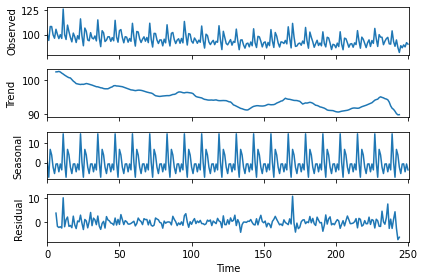

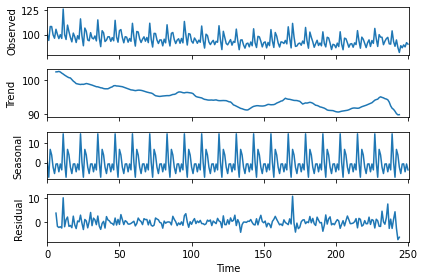

In [79]:
res = sm.tsa.seasonal_decompose(df2_k.loc['消費支出', :].values, freq=12)
res.plot()

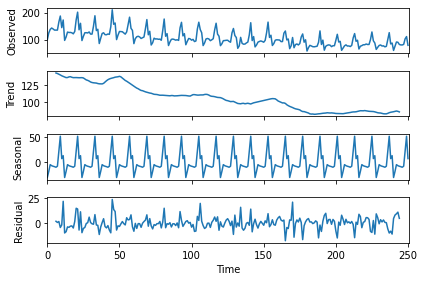

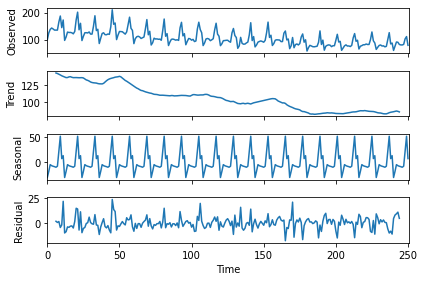

In [80]:
res = sm.tsa.seasonal_decompose(df2_k.loc['米', :].values, freq=12)
res.plot()

In [87]:
rice = pd.DataFrame({'trend': res.trend, 'observed': res.observed}, index=df2_k.columns)
px.line(rice, title='お米のトレンド部分')